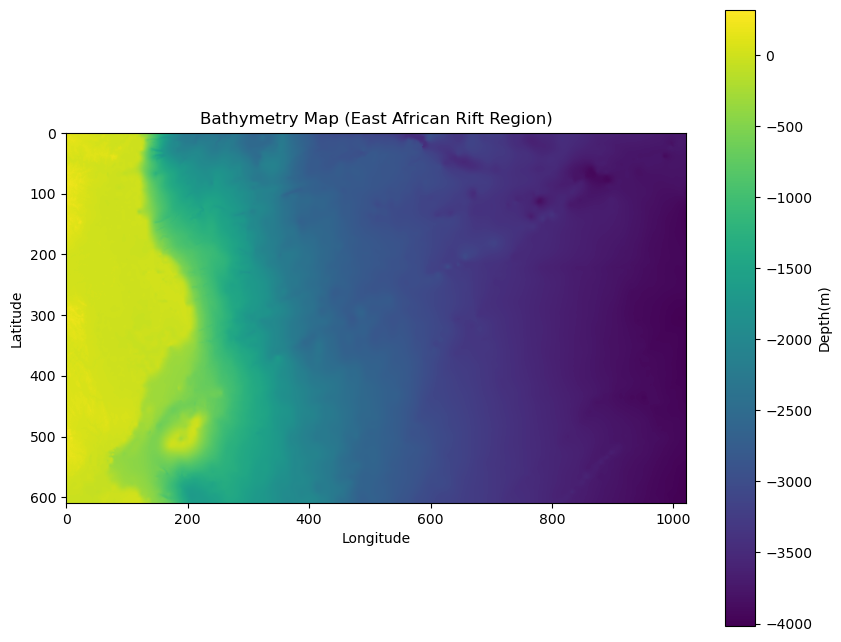

<Figure size 640x480 with 0 Axes>

In [2]:
#1. A large figure with the map of the region(East African Rift) bathymetry'
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

bathy = xr.open_dataset('East_African_rift_gebco_2023_n-6.4179_s-8.9565_w39.0732_e43.3301.nc', engine="netcdf4")

# Plot bathymetry map
plt.figure(figsize=(10, 8))
plt.imshow(bathy['elevation'], cmap='viridis')
plt.colorbar(label='Depth(m)')
plt.title('Bathymetry Map (East African Rift Region)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
plt.savefig("bathy.png", dpi=200)


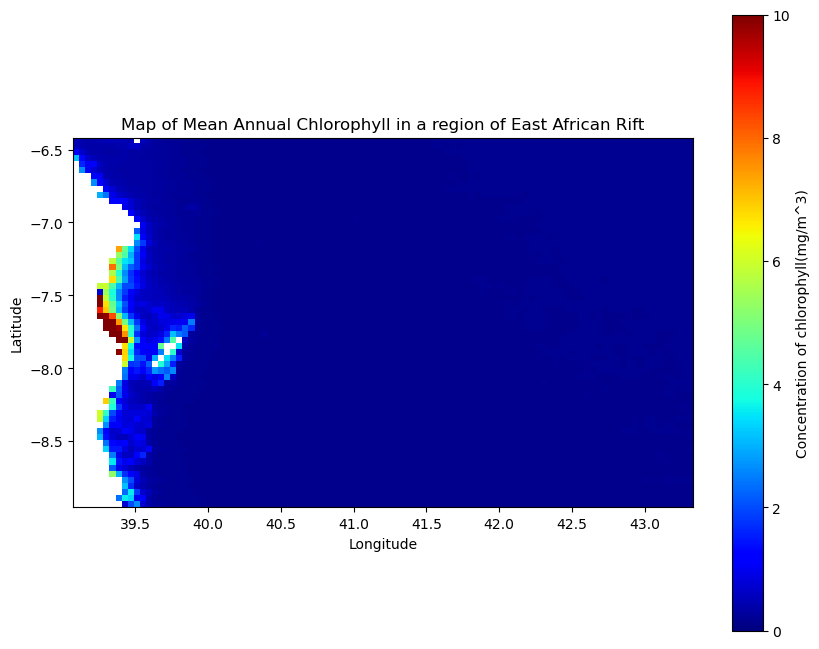

<Figure size 640x480 with 0 Axes>

In [3]:
#2.A map of the mean annual chlorophyll
chloro = xr.open_dataset('ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHLY_4km_PML_CHL-fv5.0.nc', engine="netcdf4") 

# Calculate the mean chlorophyll concentration along the time dimension
mean_chloro = chloro['chlor_a'].mean(dim='time')

#latitude and longitude ranges for the chosen region of East African Rift
min_lat, max_lat = -8.9565,	-6.4179 
min_lon, max_lon = 39.0732, 43.3301 

# Plotting the map
plt.figure(figsize=(10, 8))
plt.imshow(mean_chloro.sel(lat=slice(max_lat, min_lat), lon=slice(min_lon, max_lon)), cmap='jet', vmin=0, vmax=10, extent=(min_lon, max_lon, min_lat, max_lat))
plt.colorbar(label='Concentration of chlorophyll(mg/m^3)')
plt.title('Map of Mean Annual Chlorophyll in a region of East African Rift')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
plt.savefig("chlorophyll annual.png", dpi=200)

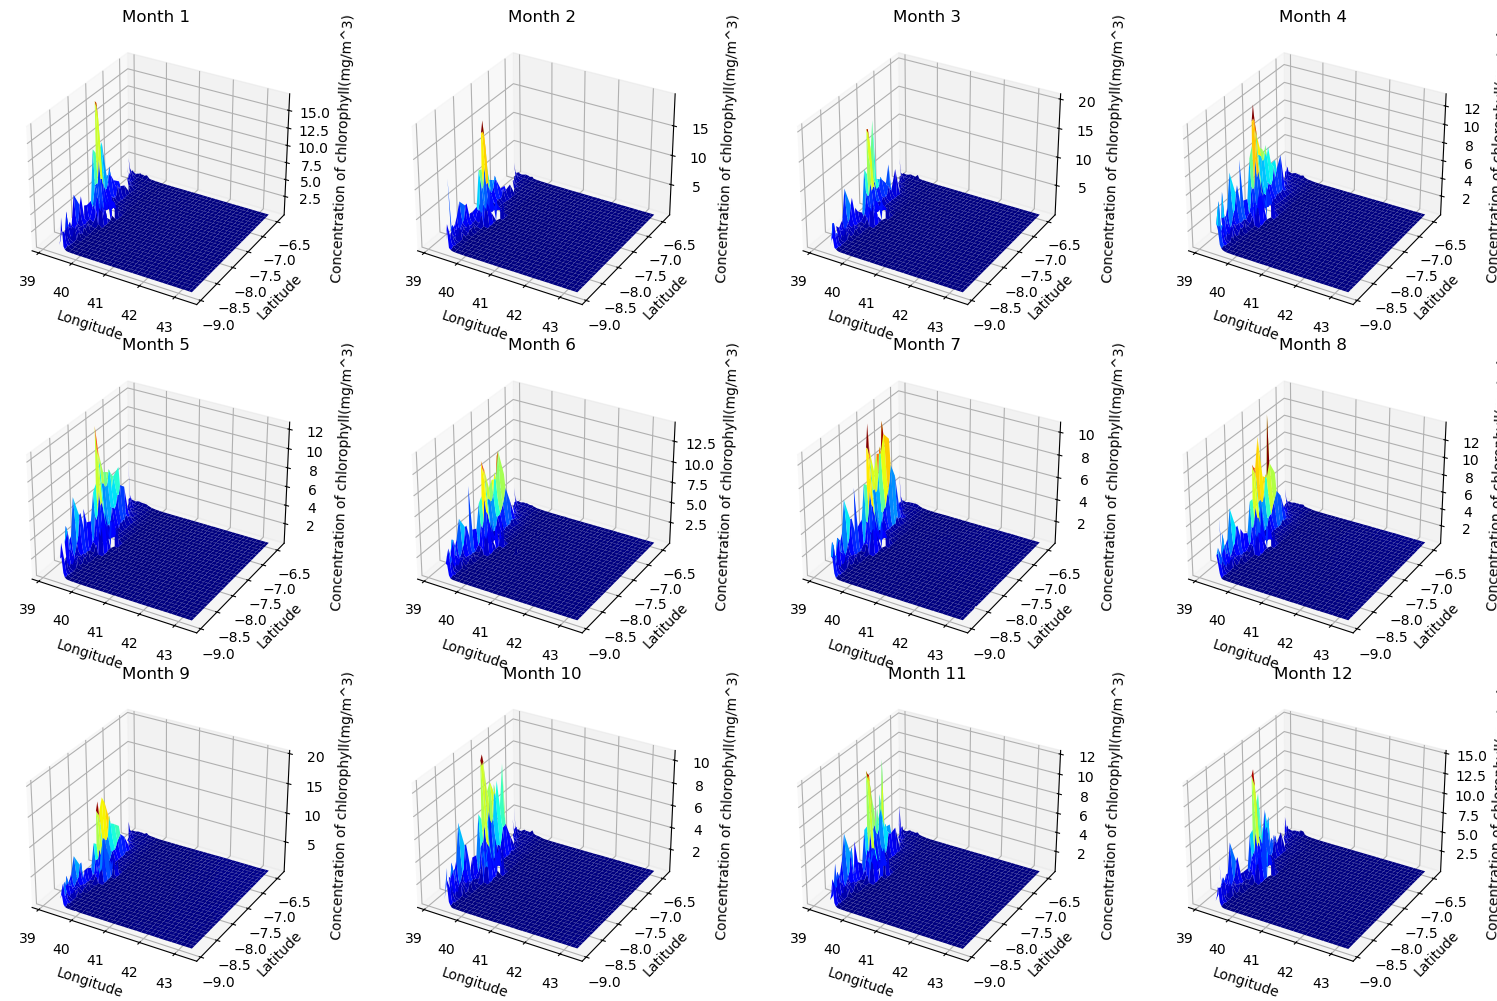

<Figure size 640x480 with 0 Axes>

In [4]:
#3.A faceted figure, showing 12 maps, one for each month
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#latitude and longitude ranges for the chosen region of East African Rift
min_lat, max_lat = -8.9565,	-6.4179 
min_lon, max_lon = 39.0732, 43.3301  

# Plotting faceted figure for each month
fig, axes = plt.subplots(3, 4, figsize=(16, 10), subplot_kw={'projection': '3d'})
for i, ax in enumerate(axes.flat):
    chloro_monthly = chloro['chlor_a'].isel(time=i)
    
    chloro_monthly = chloro_monthly.sel(lat=slice(max_lat, min_lat), lon=slice(min_lon, max_lon))
    
    X, Y = chloro_monthly.lon, chloro_monthly.lat
    X, Y = X.values, Y.values
    X, Y = X[np.newaxis, :], Y[:, np.newaxis]
    Z = chloro_monthly.values
    ax.plot_surface(X, Y, Z, cmap='jet')
    ax.set_title(f'Month {i+1}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Concentration of chlorophyll(mg/m^3)')
plt.tight_layout()
plt.show()
plt.savefig("chlorophyll monthly.png", dpi=200)

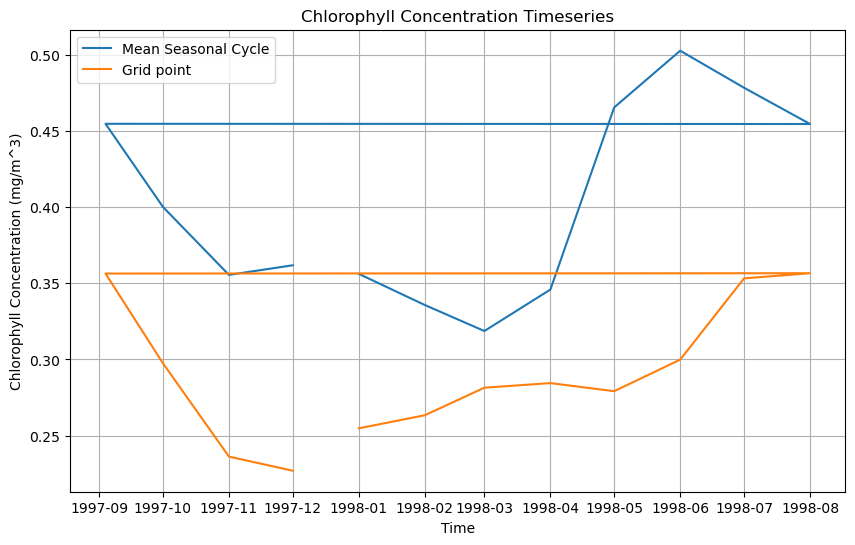

<Figure size 640x480 with 0 Axes>

In [5]:
#4.A timeseries plot showing two lines: the mean seasonal cycle of the whole region compared with the timeseries from a single grid point of choice
import matplotlib.pyplot as plt

mean_seasonal_cycle = chloro['chlor_a'].mean(dim=['lat', 'lon'])

#latitude and longitude ranges for the chosen region of East African Rift
min_lat, max_lat = -8.9565,	-6.4179  
min_lon, max_lon = 39.0732, 43.3301  

# Select chlorophyll data within the specified latitude and longitude ranges
chloro_specific_location = chloro['chlor_a'].sel(lat=slice(max_lat, min_lat), lon=slice(min_lon, max_lon))

# Plotting the timeseries
plt.figure(figsize=(10, 6))
plt.plot(mean_seasonal_cycle['time'], mean_seasonal_cycle, label='Mean Seasonal Cycle')
plt.plot(chloro_specific_location['time'], chloro_specific_location.mean(dim=['lat', 'lon']), label='Grid point')
plt.xlabel('Time')
plt.ylabel('Chlorophyll Concentration (mg/m^3)')
plt.title('Chlorophyll Concentration Timeseries')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("chlorophyll timeseries.png", dpi=200)